# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city #can i do url+"&q"+city instead?
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        #dont forget json parse! #suggested by BCS
        cw_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = cw_json["coord"]["lat"]#BCS helped catch that i typed "coor" instead of "coord"
        city_lng = cw_json["coord"]["lon"]
        city_max_temp = cw_json["main"]["temp_max"]
        city_humidity = cw_json["main"]["humidity"]
        city_clouds = cw_json["clouds"]["all"]
        city_wind = cw_json["wind"]["speed"]
        city_country = cw_json["sys"]["country"]
        city_date = cw_json["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | onega
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | suva
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | kulhudhuffushi
Processing Record 7 of Set 1 | hengchun
Processing Record 8 of Set 1 | mount pearl
Processing Record 9 of Set 1 | palembang
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | boa vista
Processing Record 18 of Set 1 | masina
Processing Record 19 of Set 1 | cherlak
Processing Record 20 of Set 1 | liwonde
Processing Record 21 of Set 1 | tenenkou
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 

Processing Record 42 of Set 4 | banda aceh
Processing Record 43 of Set 4 | camajuani
Processing Record 44 of Set 4 | cartagena
Processing Record 45 of Set 4 | keflavik
Processing Record 46 of Set 4 | al hasakah
Processing Record 47 of Set 4 | caspe
Processing Record 48 of Set 4 | tofol
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | hermanus
Processing Record 1 of Set 5 | itacare
Processing Record 2 of Set 5 | lakatoro
Processing Record 3 of Set 5 | mossendjo
Processing Record 4 of Set 5 | san julian
Processing Record 5 of Set 5 | kapuskasing
Processing Record 6 of Set 5 | beau vallon
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | enewetak
Processing Record 10 of Set 5 | rio vista
Processing Record 11 of Set 5 | geraldton
Processing Record 12 of Set 5 | carutapera
Processing Record 13 of Set 5 | vilyuchinsk
Processing Record 14 of Set 5 | labasa
Processing Record 15 of Set 5 | nar'yan-mar
Proces

Processing Record 34 of Set 8 | bamboo flat
Processing Record 35 of Set 8 | buta
Processing Record 36 of Set 8 | jeannette
Processing Record 37 of Set 8 | burang
Processing Record 38 of Set 8 | peabiru
Processing Record 39 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 40 of Set 8 | stung treng
Processing Record 41 of Set 8 | puerto baquerizo moreno
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | horta
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | warrnambool
Processing Record 46 of Set 8 | raduzhny
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | zharkent
Processing Record 49 of Set 8 | uliastay
Processing Record 0 of Set 9 | toungo
Processing Record 1 of Set 9 | touros
Processing Record 2 of Set 9 | cable beach
City not found. Skipping...
Processing Record 3 of Set 9 | tosontsengel
Processing Record 4 of Set 9 | greymouth
Processing Record 5 of Set 9 | vorgashor
Processing Record 6 of Set 9 

Processing Record 21 of Set 12 | port macquarie
Processing Record 22 of Set 12 | dalnerechensk
Processing Record 23 of Set 12 | nuku'alofa
Processing Record 24 of Set 12 | zaragoza
Processing Record 25 of Set 12 | porbandar
Processing Record 26 of Set 12 | carora
Processing Record 27 of Set 12 | chelak
Processing Record 28 of Set 12 | saint-philippe
Processing Record 29 of Set 12 | alcala la real
Processing Record 30 of Set 12 | timbiqui
Processing Record 31 of Set 12 | senador guiomard
Processing Record 32 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 33 of Set 12 | driefontein
Processing Record 34 of Set 12 | anori
Processing Record 35 of Set 12 | monrovia
Processing Record 36 of Set 12 | tual
Processing Record 37 of Set 12 | vorkuta
Processing Record 38 of Set 12 | ilabaya
Processing Record 39 of Set 12 | brazzaville
Processing Record 40 of Set 12 | minas
Processing Record 41 of Set 12 | redencao
Processing Record 42 of Set 12 | bryne
Processing Record 43 of Set 

In [4]:
print(cw_json) #make sure data was appended

{'coord': {'lon': 5.5228, 'lat': 22.785}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.95, 'feels_like': 15.14, 'temp_min': 16.95, 'temp_max': 16.95, 'pressure': 1023, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1699248005, 'sys': {'type': 1, 'id': 1066, 'country': 'DZ', 'sunrise': 1699249512, 'sunset': 1699289870}, 'timezone': 3600, 'id': 2478216, 'name': 'Tamanghasset', 'cod': 200}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,88,75,2.68,EC,1699248190
1,onega,63.9061,38.1404,1.72,99,100,2.26,RU,1699248190
2,atafu village,-8.5421,-172.5159,29.07,71,100,1.47,TK,1699248191
3,suva,-18.1416,178.4415,29.71,70,40,3.60,FJ,1699248191
4,tiksi,71.6872,128.8694,-24.60,99,43,2.31,RU,1699248191


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,88,75,2.68,EC,1699248190
1,onega,63.9061,38.1404,1.72,99,100,2.26,RU,1699248190
2,atafu village,-8.5421,-172.5159,29.07,71,100,1.47,TK,1699248191
3,suva,-18.1416,178.4415,29.71,70,40,3.60,FJ,1699248191
4,tiksi,71.6872,128.8694,-24.60,99,43,2.31,RU,1699248191


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

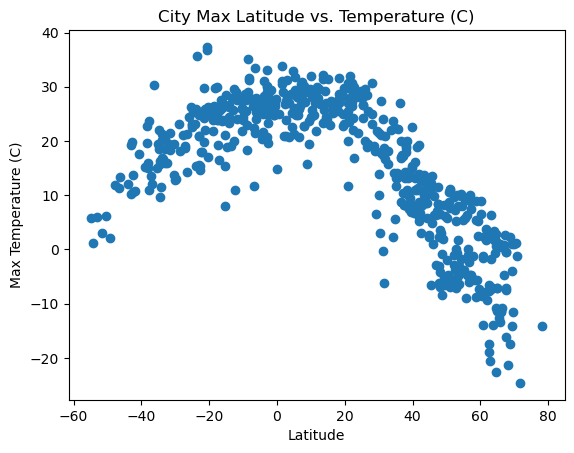

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (C)")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

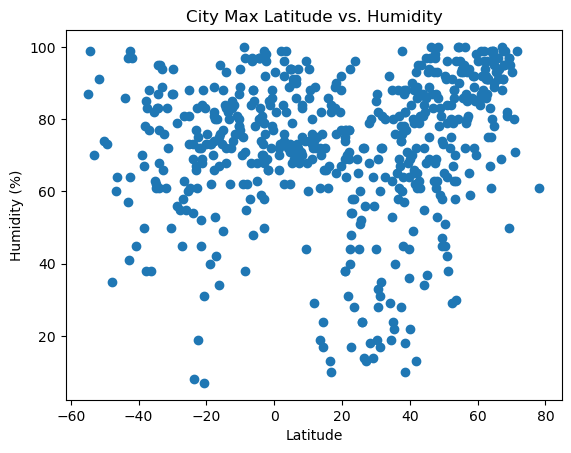

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
#copy and paste, but dont forget to change your data calls and labels!
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

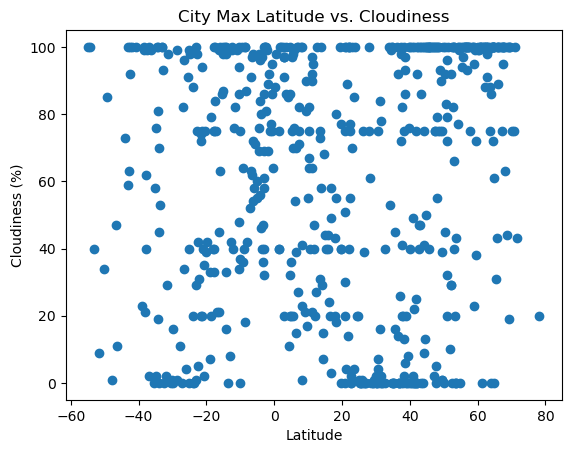

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
#copy and paste, but dont forget to change your data calls and labels!
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

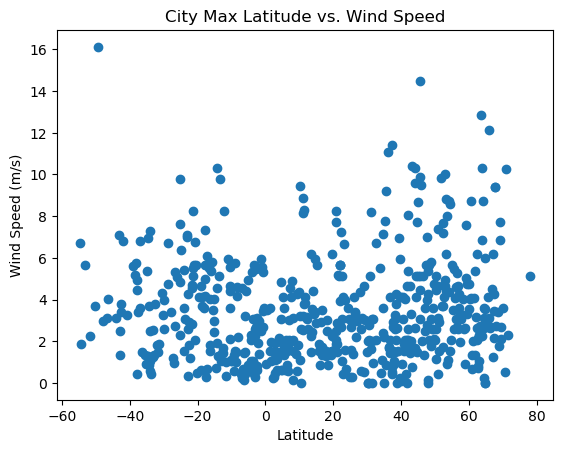

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
#copy and paste, but dont forget to change your data calls and labels!
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed")
plt.show()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_scatt, y_scatt,text_coordinates):
    #if we define then we can copy and paste? how do we make sure values do not get mixed up?
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatt, y_scatt)
    reggie_values = x_scatt * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    plt.scatter(x_scatt, y_scatt)
    plt.plot(x_scatt, reggie_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize= 15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,onega,63.9061,38.1404,1.72,99,100,2.26,RU,1699248190
4,tiksi,71.6872,128.8694,-24.60,99,43,2.31,RU,1699248191
5,kulhudhuffushi,6.6221,73.0700,27.85,73,100,1.86,MV,1699248084
6,hengchun,22.0042,120.7439,28.26,69,40,3.91,TW,1699248191
7,mount pearl,47.5166,-52.7813,8.41,97,75,5.66,CA,1699247935


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
#copy from northern_hemi_df but dont forget to change!
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,88,75,2.68,EC,1699248190
2,atafu village,-8.5421,-172.5159,29.07,71,100,1.47,TK,1699248191
3,suva,-18.1416,178.4415,29.71,70,40,3.60,FJ,1699248191
8,palembang,-2.9167,104.7458,33.05,58,40,2.57,ID,1699248191
12,luderitz,-26.6481,15.1594,14.33,81,34,2.72,NaN,1699248192


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8796745024529471


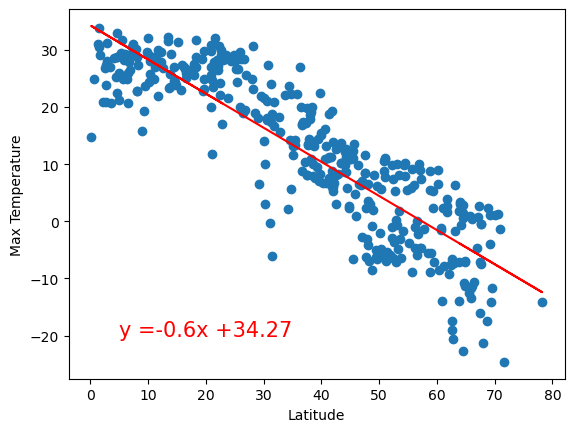

In [16]:
# Linear regression on Northern Hemisphere
#x_scatt = northern_hemi_df["Lat"]
#y_scatt = northern_hemi_df["Max Temp"]
#plot_linear_regression(x_scatt, y_scatt)#do not need "def" part or colon!
#TypeError: annotate() missing 1 required positional argument: 'xy
#adding coordinates to def
x_scatt = northern_hemi_df["Lat"]
y_scatt = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plot_linear_regression(x_scatt, y_scatt, (5,-20)) #these coordinates help fit slope equation on graph?

The r-value is: 0.7014545222565532


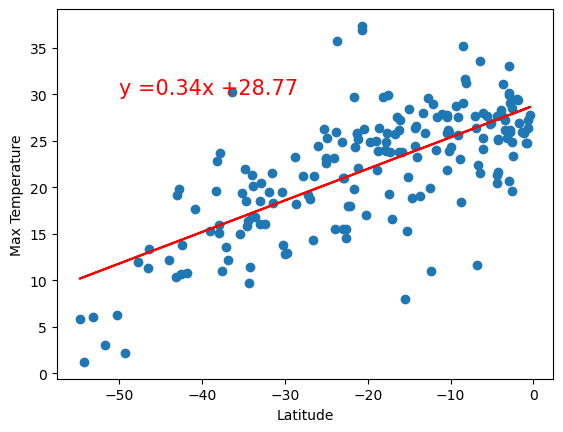

In [17]:
#copy, paste, change labels and values!
x_scatt = southern_hemi_df["Lat"]
y_scatt = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plot_linear_regression(x_scatt, y_scatt, (-50,30)) #these coordinates help fit slope equation on graph?

**As the southern latitude approaches zero (0), or the center of the earth, the max temperature increases and we see an inverse of this with the norhtern hemisphere.**

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25434025063583465


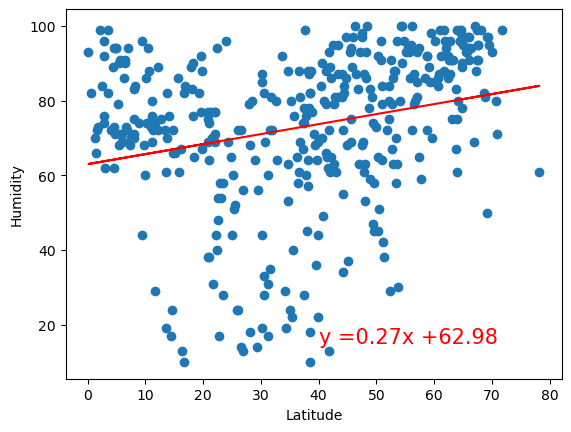

In [18]:
# Northern Hemisphere
#copy, paste, change labels and values!
x_scatt = northern_hemi_df["Lat"]
y_scatt = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_scatt, y_scatt, (40,15))

The r-value is: 0.12288883130425586


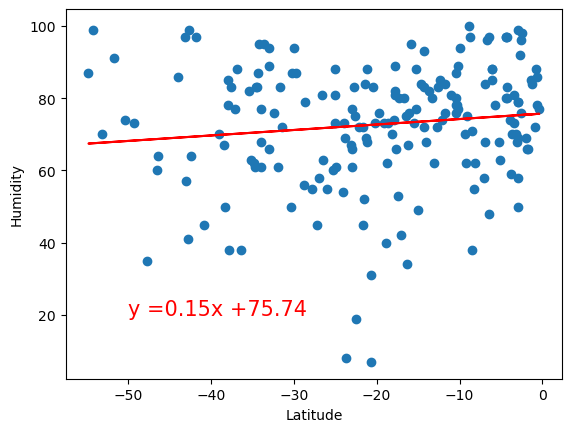

In [19]:
# Southern Hemisphere
x_scatt = southern_hemi_df["Lat"]
y_scatt = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_scatt, y_scatt, (-50,20))

**Comparing humidities between the two hemishperes we see slow increase of humidity in almost opposite directions (latitide wise) so we need to pay closer attention to the r-value which is very low and tells us that humidity and latitude do not have a reliable, variable significance.**

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22376224803963485


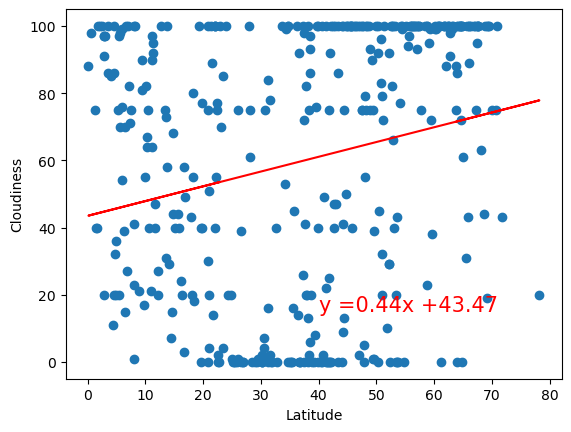

In [20]:
# Northern Hemisphere
x_scatt = northern_hemi_df["Lat"]
y_scatt = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_scatt, y_scatt, (40,15))

The r-value is: 0.17225364168259175


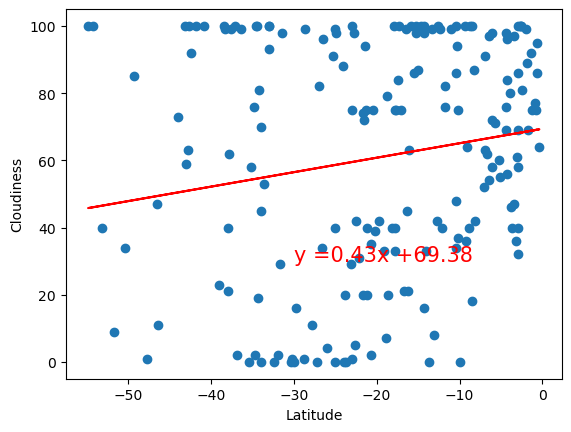

In [21]:
# Southern Hemisphere
x_scatt = southern_hemi_df["Lat"]
y_scatt = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_scatt, y_scatt, (-30,30))

**The relationship between cloudiness and latitude have very low r-values for both northern and southern hemispheres so it does not have much statisttical significance.**

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23217896606875202


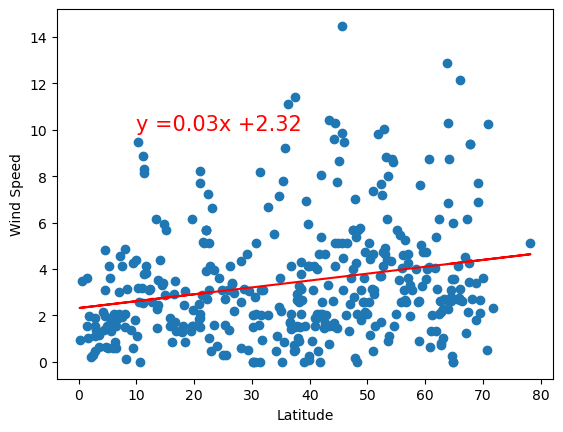

In [22]:
# Northern Hemisphere
x_scatt = northern_hemi_df["Lat"]
y_scatt = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_scatt, y_scatt, (10,10))

The r-value is: -0.21212100466822303


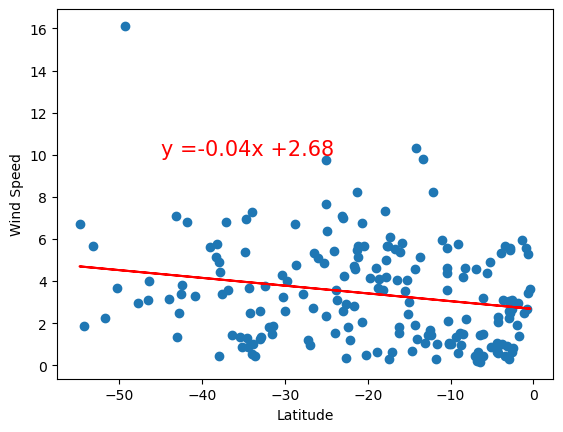

In [23]:
# Southern Hemisphere
x_scatt = southern_hemi_df["Lat"]
y_scatt = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_scatt, y_scatt, (-45,10))

**The relationship between wind speed and latitude have very low r-values for both northern and southern hemispheres so it does not have much statisttical significance.**